## Calcolo Montecarlo di un integrale con il metodo dell'$\textit{importance sampling}$. 

### Standard sampling

In questo foglio vogliamo mostrare l'efficacia del metodo detto $\textit{importance sampling}$ come mezzo per ridurre la varianza sul calcolo di un certo integrale.
Concentriamoci sulla seguente quantità: 
$$
I = \int_0^1 \frac{\pi}{2} cos\Big(\frac{\pi}{2}x\Big) dx = 1 .\tag{1}
$$

Questo integrale può essere interpretato come il valor medio della random variabile $f(x) = \frac{\pi}{2} cos\big(\frac{\pi}{2}x\big) $ distribuita con distribuzione di probabilità 

$$
p(x) =
\left\{
	\begin{array}{ll}
		1  & \mbox{se } x \in [ 0, 1) \tag{2}\\
		0 & \mbox{  altrimenti .}
	\end{array}
\right.
$$ 

Ovviamente ragionando così si può anche calcolare la varianza della RV $f(x)$ come segue:

$$
\sigma^2_f = \langle (f - \langle f \rangle_p)^2 \rangle_p = \int_0^1 \Big(\frac{\pi}{2} cos\big(\frac{\pi}{2}x\big) - 1\Big)^2 dx = \frac{\pi^2}{8} - 1 \approx 0,2337 . \tag{3}
$$

dove con $\langle \cdot \rangle_p$ si indica la media è eseguita con la pdf $p(x)$.
Come abbiamo già visto (Esercizio 1.1), quando valutiamo un integrale tramite un metodo Monte Carlo l'incertezza sulla nostra stima va come $\sigma/\sqrt N$ dove $N$ è la dimensione del sample che abbiamo utilizzato. Dunque a parità di lunghezza del campione, l'unico modo per diminuire l'incertezza Monte Carlo è quello di diminuire la varianza $\sigma$. Questa osservazione è il punto di partenza per l'introduzione dell'$\textit{importance sampling}$.

Iniziamo mostrando quanto affermato, calcolando cioè l'integrale e la varianza tramite un sampling della distribuzione $p(x)$. La dimensione del sample originale era di $10^5$ punti, ma tramite il metodo del blocking abbiamo calcolato $100$ stime diverse ciascuna ricavata da un sample di $1000$ punti. Sulla base di quanto detto sopra l'incertezza Monte Carlo sulla  singola stima di $I$ è pari a 

$$
\epsilon = \sigma_f/\sqrt{1000} \approx 0.0153 \,,
$$

e quindi la deviazione standarda dalla media del nostro set di $100$ misure è $\epsilon/\sqrt{100} = 0.00153$. Ci aspettiamo quindi un'errore di questo ordine di grandezza sulle nostre misure.

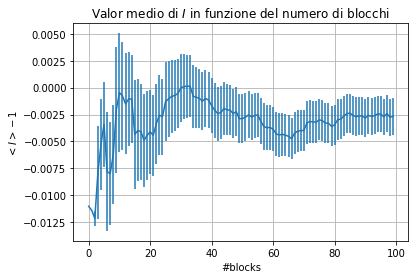

La miglior stima per I è  0.99732 +/- 0.0017026420348946736


In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

def error(AV1,AV2,n):  # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV1[n] - AV2[n])/n)

x, p_ave, p_ave2 = np.loadtxt("I_unif.out", usecols=(0, 1, 2), delimiter=' ', unpack='true')
N = len(x)
n = np.arange(N)
e = np.zeros(N)

for i in range(N):
    e[i] = error(p_ave, p_ave2,i)

# Plotto il valor medio con errore dell'integrale (1) calcolato con un metodo MC
# standard sampling: distribuzione di probabilità della forma (2)
plt.errorbar(n, x-1, e);
plt.xlabel('#blocks')
plt.ylabel('$<I>-1$')
plt.title('Valor medio di $I$ in funzione del numero di blocchi')
plt.grid(True)
plt.show()
print('La miglior stima per I è ', x[N-1], '+/-', e[N-1])


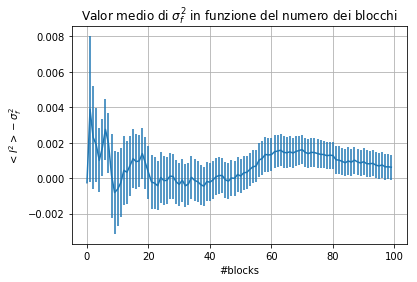

In [2]:
x, p_ave, p_ave2 = np.loadtxt("V_unif.out", usecols=(0, 1, 2), delimiter=' ', unpack='true')
N = len(x)
#n = np.arange(N)
e = np.zeros(N)

for i in range(N):
    e[i] = error(p_ave, p_ave2,i)

# Plotto il valor medio con errore dell'integrale (3) calcolato con un metodo MC
# standard sampling: distribuzione di probabilità della forma (2)
plt.errorbar(n, x - (math.pi**2/8 - 1), e);
plt.xlabel('#blocks')
plt.ylabel('$<I^2>-\sigma_f^2$')
plt.title('Valor medio di $\sigma_f^2$ in funzione del numero dei blocchi')
plt.grid(True)
plt.show()

Effettivamente l'incertezza sul calcolo di $I$ è ~$0.0017$, molto prossima al valore teorico calcolato sopra (~$0.0015$). 

### Importance sampling

Riassumendo quanto visto a lezione, l'idea dell'importance samplig è quella di introdurre una nuova distribuzione di probabilità per valutare l'integrale. Riferendoci al caso semplice di un integrale nella stessa forma di (1), data una funzione $g$ normalizzata a $1$ sull'intervallo $[0, 1)$, si ha

$$
\big\langle \frac{f}{g} \big\rangle_g = \int_0^1 \frac{f(x)}{g(x)} g(x) dx = \int_0^1 f(x) dx= I . \tag{5}
$$

Dunque estraendo punti distribuiti secondo la $g(x)$ si potrà ancora ottenere una stima di $I$ via Montecarlo, questa volta valutando non più la funzione $f$ ma la funzione $\frac{f}{g}.$ L'efficacia del metodo sta nel fatto che a questo punto, se la funzione $g$ non ha zeri nel dominio, la varianza del nostro calcolo ha la nuova forma 

$$
\sigma_g^2 = \big\langle\Big(\frac{f}{g} - \big\langle \frac{f}{g} \big\rangle_g \Big)^2 \big\rangle_g = \int_0^1 \Big(\frac{f(x)}{g(x)} - I \Big)^2 g(x) dx . \tag{6}
$$

$\textbf{Affermazione:}$  se  $g$ è scelta in modo da essere simile alla funzione integranda originaria $f$, l'effetto di questa procedura sarà una riduzione della quantità $\sigma_g$ rispetto a $\sigma_f$, e quindi in un calcolo MC l'errore sul valor medio sarà più basso.

Verifichiamo ora quest'affermazione concentrandoci sul nostro integrale. La scelta che è stata fatta è quella di usare la distribuzione di probabilità 

$$
g(x) = \frac{3}{2}(1 - x)\,, \; \; x \in [0,1) \tag{7}
$$

la cui funzione cumulativa è facilmente calcolabile e invertibile. Tramite un sampling di questa distribuzione di probabilità abbiamo quindi calcolato i valori dell'integrale $I$ e della varianza $\sigma_g^2$. Abbiamo infine utilizzato ancora il metodo del blocking per calcolare media e deviazione standard sul nostro set di misure. I grafici mostrano l'andamento dei valori medi e delle incertezze statistiche al variare del numero di blocchi considerati. Ci aspettiamo, per quanto anticipato, che l'incertezza sulla stima di $I$ sia minore rispetto al caso precedente.

$\textit{Osservazione:}$
Notiamo che lo zero di $g$ in $1$ non crea problemi nelle procedure numeriche, in quanto $\frac{f(x)}{g(x)} \rightarrow 1 $ per $x \rightarrow 1$.


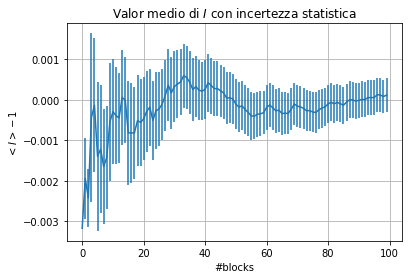

La miglior stima per I è  1.000117 +/- 0.0004143877070045664


In [7]:
x, p_ave, p_ave2 = np.loadtxt("I_imp.out", usecols=(0, 1, 2), delimiter=' ', unpack='true')

N = len(x)
e = np.zeros(N)

for i in range(N):
    e[i] = error(p_ave, p_ave2,i)

# Plotto il valor medio con errore dell'integrale (5) calcolato con un metodo MC
# importance sampling: distribuzione di probabilità della forma (7)
plt.errorbar(n, x-1, e);
plt.xlabel('#blocks')
plt.ylabel('$<I>-1$')
plt.title('Valor medio di $I$ con incertezza statistica')
plt.grid(True)
plt.show()
print('La miglior stima per I è ', x[N-1], '+/-', e[N-1])


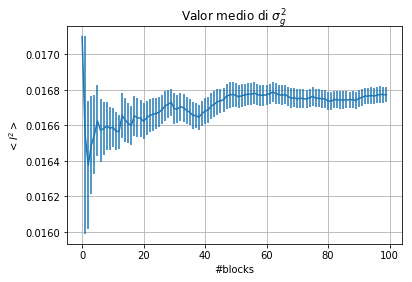

In [21]:
x, p_ave, p_ave2 = np.loadtxt("V_imp.out", usecols=(0, 1, 2), delimiter=' ', unpack='true')
N = len(x)
#n = np.arange(N)
e = np.zeros(N)

for i in range(N):
    e[i] = error(p_ave, p_ave2,i)

# Plotto il valor medio con errore dell'integrale (6) calcolato con un metodo MC
# importance sampling: distribuzione di probabilità della forma (7)
plt.errorbar(n, x, e);
plt.xlabel('#blocks')
plt.ylabel('$<I^2>$')
plt.title('Valor medio di $\sigma_g^2$')
plt.grid(True)
plt.show()


### Risultati

Abbiamo verificato che il metodo dell'importance sampling permette di abbassare l'incertezza sul calcolo Monte Carlo di un integrale: nel nostro caso si è passati da un'incertezza di circa $0.0017$ nel caso di un sampling uniforme a una di circa $0.0004$ con l'importance sampling, con una riduzione quindi di un ordine di grandezza.